<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# LGBMClassifier with StandardScaler

This Code template is for the Classification task using LGBMClassifier with data scaling with StandardScaler. The LightGBM algorithm performs well in machine learning competitions because of its robust handling of a variety of data types, relationships, and distributions.

### Required Packages

In [1]:
!pip install lightgbm

In [2]:
import warnings 
import numpy as np 
import pandas as pd
import seaborn as se  
import matplotlib.pyplot as plt 
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= ""

List of features which are  required for model training

In [5]:
#x_values
features=[]

Target feature for prediction.

In [6]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [4]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [7]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

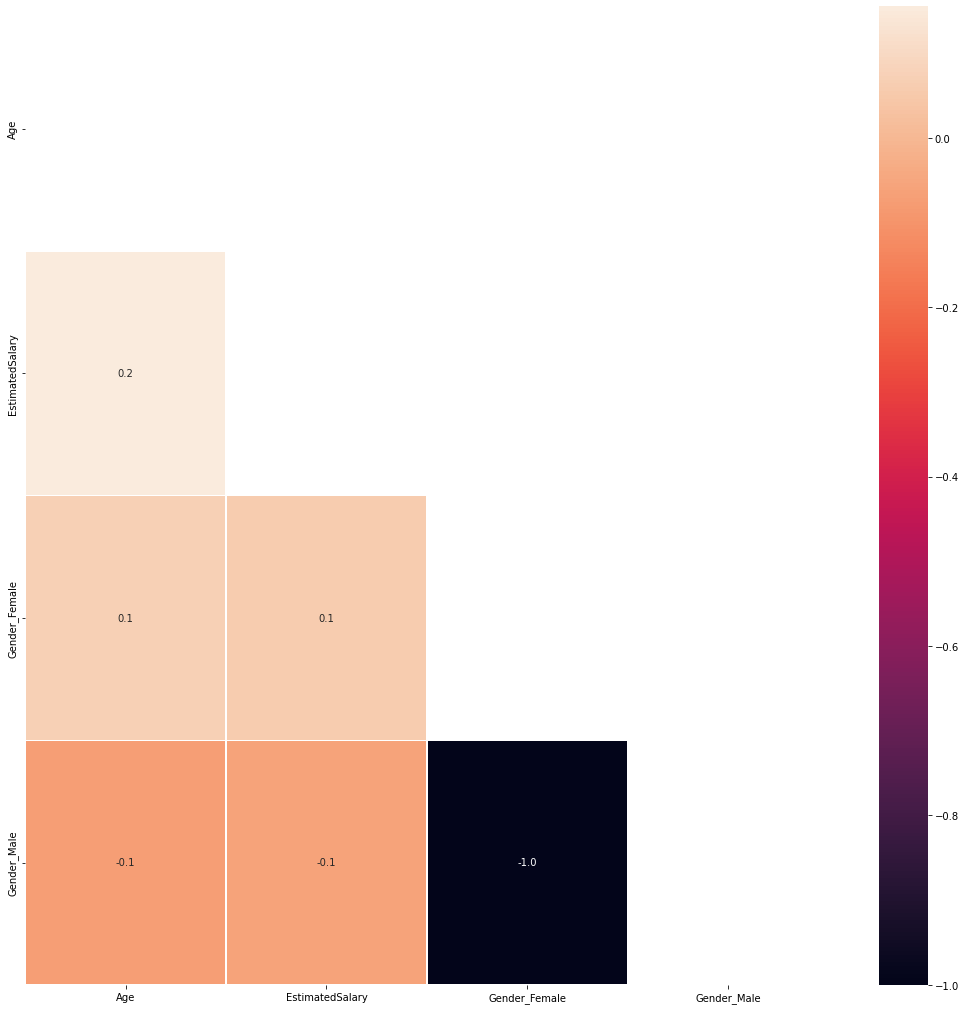

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

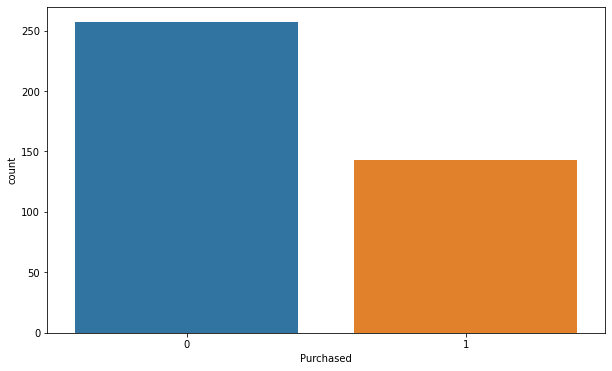

In [11]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

## Data Scaling

For rescaling the data StandardScaler function of Sklearn is used.
Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:

- z = (x - u) / s

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [13]:
scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train) #fitting the data on the training set
X_test=scaler.transform(X_test) #scaling testing set

### Model
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. 

Refer [API](https://lightgbm.readthedocs.io/en/latest/Python-API.html) for more.

In [14]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [15]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 83.75 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

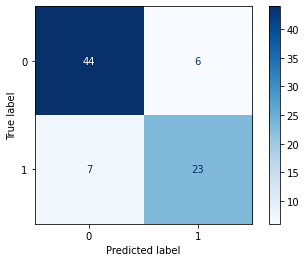

In [16]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

#### Classification Report

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [17]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.79      0.77      0.78        30

    accuracy                           0.84        80
   macro avg       0.83      0.82      0.83        80
weighted avg       0.84      0.84      0.84        80



#### Feature Importances.

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.
If importance_type = â€œgainâ€, result contains total gains of splits which use the feature.
If importance_type = â€œsplitâ€, result contains numbers of times the feature is used in a model. 

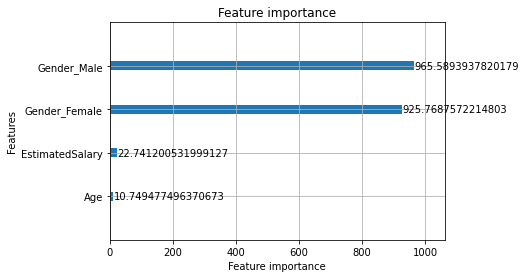

In [18]:
lgb.plot_importance(model,importance_type='gain',max_num_features=10)
plt.rcParams['figure.figsize'] = [8,6]
n_features = len(X.columns)
plt.yticks(np.arange(n_features), X.columns)
plt.show()


(-1.0, 4.0)

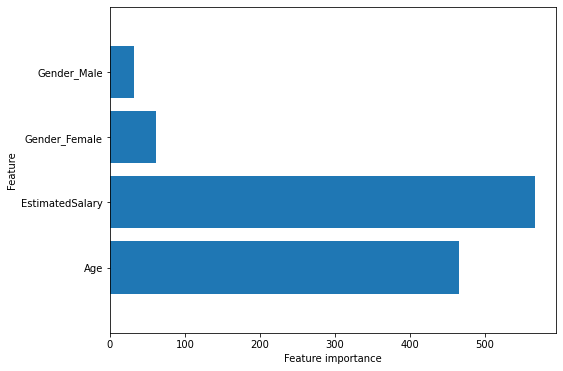

In [19]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Creator: Vamsi Mukkamala , Github: [Profile](https://github.com/vmc99)